In [2]:
# pip install yfinance
import yfinance as yf
import pandas as pd

In [3]:
tickers = ['SPY', 'MSFT', 'AAPL', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'META', 'NKE', 'NFLX'] 
df = yf.download(tickers, start = '2018-01-01', end = '2022-12-31', interval='1mo', progress=False) # use monthly prices
df.head()

YF.download() has changed argument auto_adjust default to True


Price           Close                                               \
Ticker           AAPL       AMZN       GOOG        META       MSFT   
Date                                                                 
2018-01-01  39.344830  72.544502  58.287567  186.178802  88.027718   
2018-02-01  41.856892  75.622498  55.038738  177.641434  86.878815   
2018-03-01  39.587818  72.366997  51.404797  159.181931  84.959785   
2018-04-01  38.993221  78.306503  50.684387  171.345459  87.054207   
2018-05-01  44.092121  81.481003  54.055275  191.050201  92.006409   

Price                                                               ...  \
Ticker            NFLX        NKE      NVDA         SPY       TSLA  ...   
Date                                                                ...   
2018-01-01  270.299988  63.020195  6.078581  251.718018  23.620667  ...   
2018-02-01  291.380005  61.920898  5.984607  242.565414  22.870667  ...   
2018-03-01  295.350006  61.375866  5.730729  234.975540  17.742001  ...   
2018-04-01  312.459991  63.368320  5.565182  237.135880  19.593332  ...   
2018-05-01  351.600006  66.527946  6.240479  242.900421  18.982000  ...   

Price           Volume                                               \
Ticker            AAPL        AMZN       GOOG       META       MSFT   
Date                                                                  
2018-01-01  2638717600  1927424000  574768000  495655700  574258400   
2018-02-01  3711577200  2755680000  847640000  516251600  725663300   
2018-03-01  2854910800  2608002000  907066000  996201700  750754800   
2018-04-01  2664617200  2598392000  834318000  750072700  668130700   
2018-05-01  2483905200  1432310000  636988000  401144100  509417900   

Price                                                                  
Ticker           NFLX        NKE         NVDA         SPY        TSLA  
Date                                                                   
2018-01-01  238377600  157812200  11456216000  1985506700  1864072500  
2018-02-01  184585800  160317000  14915528000  2923722000  1637850000  
2018-03-01  263449400  174066700  14118440000  2323561800  2359027500  
2018-04-01  262006000  158981900  11144008000  1998466500  2854662000  
2018-05-01  142050800  129566300  11978240000  1606397200  2333671500  

[5 rows x 50 columns]

In [5]:
df = df.loc[:, (['Close'], tickers)]
df.columns = df.columns.droplevel() # drop MultiIndex
df = df.reset_index()
df.head()

Ticker,Date,SPY,MSFT,AAPL,GOOG,AMZN,TSLA,NVDA,META,NKE,NFLX
0,2018-01-01,251.718018,88.027718,39.344830,58.287567,72.544502,23.620667,6.078581,186.178802,63.020195,270.299988
1,2018-02-01,242.565414,86.878815,41.856892,55.038738,75.622498,22.870667,5.984607,177.641434,61.920898,291.380005
2,2018-03-01,234.975540,84.959785,39.587818,51.404797,72.366997,17.742001,5.730729,159.181931,61.375866,295.350006
3,2018-04-01,237.135880,87.054207,38.993221,50.684387,78.306503,19.593332,5.565182,171.345459,63.368320,312.459991
4,2018-05-01,242.900421,92.006409,44.092121,54.055275,81.481003,18.982000,6.240479,191.050201,66.527946,351.600006


In [9]:
prices = df.melt(id_vars = 'Date')
prices = prices.rename(columns={'Date': 'ds', 'Ticker': 'unique_id', 'value': 'y'})
prices = prices[['unique_id', 'ds', 'y']]
prices

,unique_id,ds,y
0,SPY,2018-01-01,251.718018
1,SPY,2018-02-01,242.565414
2,SPY,2018-03-01,234.975540
3,SPY,2018-04-01,237.135880
4,SPY,2018-05-01,242.900421
...,...,...,...
595,NFLX,2022-08-01,223.559998
596,NFLX,2022-09-01,235.440002
597,NFLX,2022-10-01,291.880005
598,NFLX,2022-11-01,305.529999


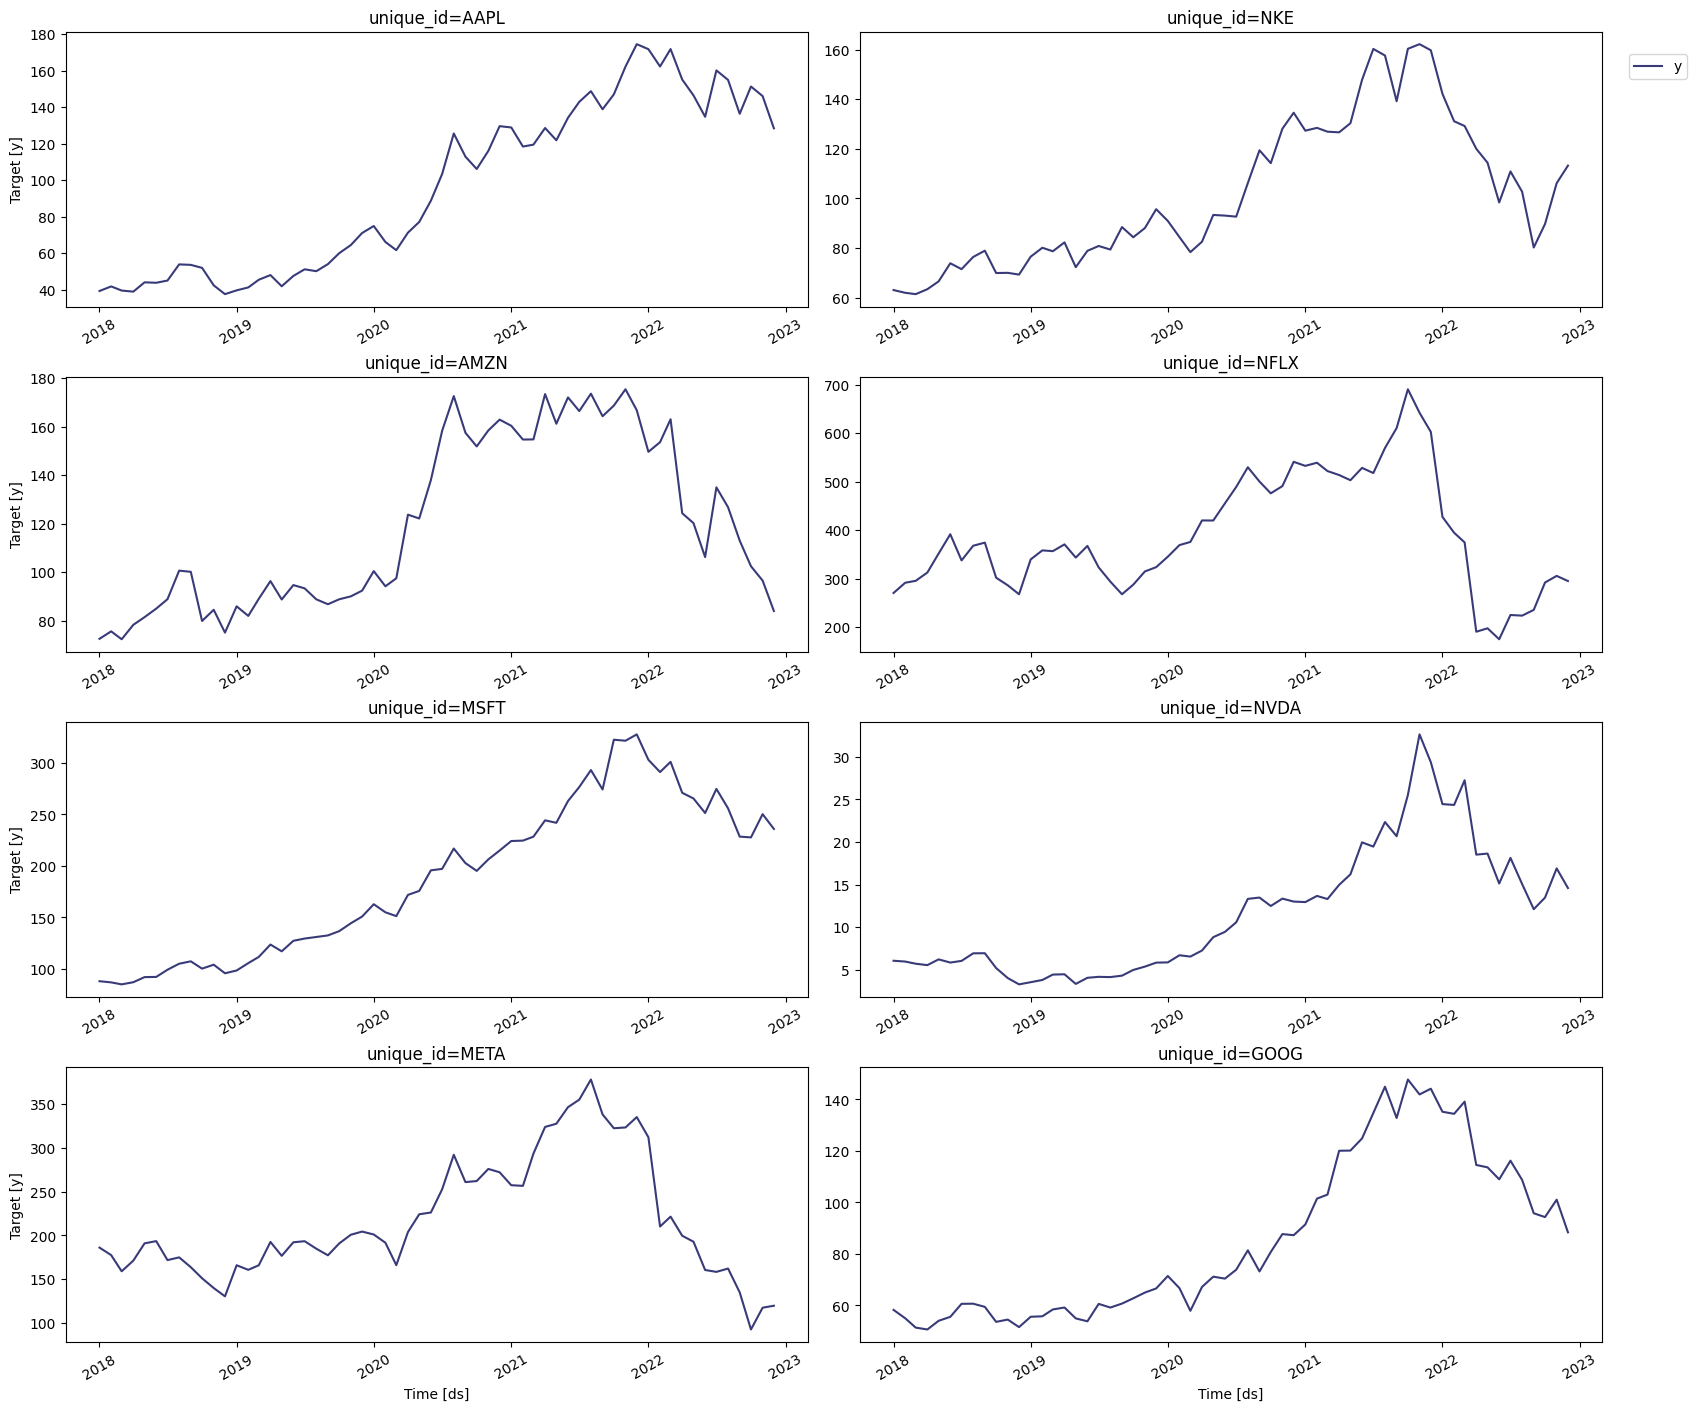

In [10]:
from statsforecast import StatsForecast
StatsForecast.plot(prices)

In [11]:
import numpy as np 
prices['rt'] = prices['y'].div(prices.groupby('unique_id')['y'].shift(1))
prices['rt'] = np.log(prices['rt'])

returns = prices[['unique_id', 'ds', 'rt']]
returns = returns.rename(columns={'rt':'y'})
returns

,unique_id,ds,y
0,SPY,2018-01-01,NaN
1,SPY,2018-02-01,-0.037038
2,SPY,2018-03-01,-0.031790
3,SPY,2018-04-01,0.009152
4,SPY,2018-05-01,0.024018
...,...,...,...
595,NFLX,2022-08-01,-0.005976
596,NFLX,2022-09-01,0.051776
597,NFLX,2022-10-01,0.214887
598,NFLX,2022-11-01,0.045705


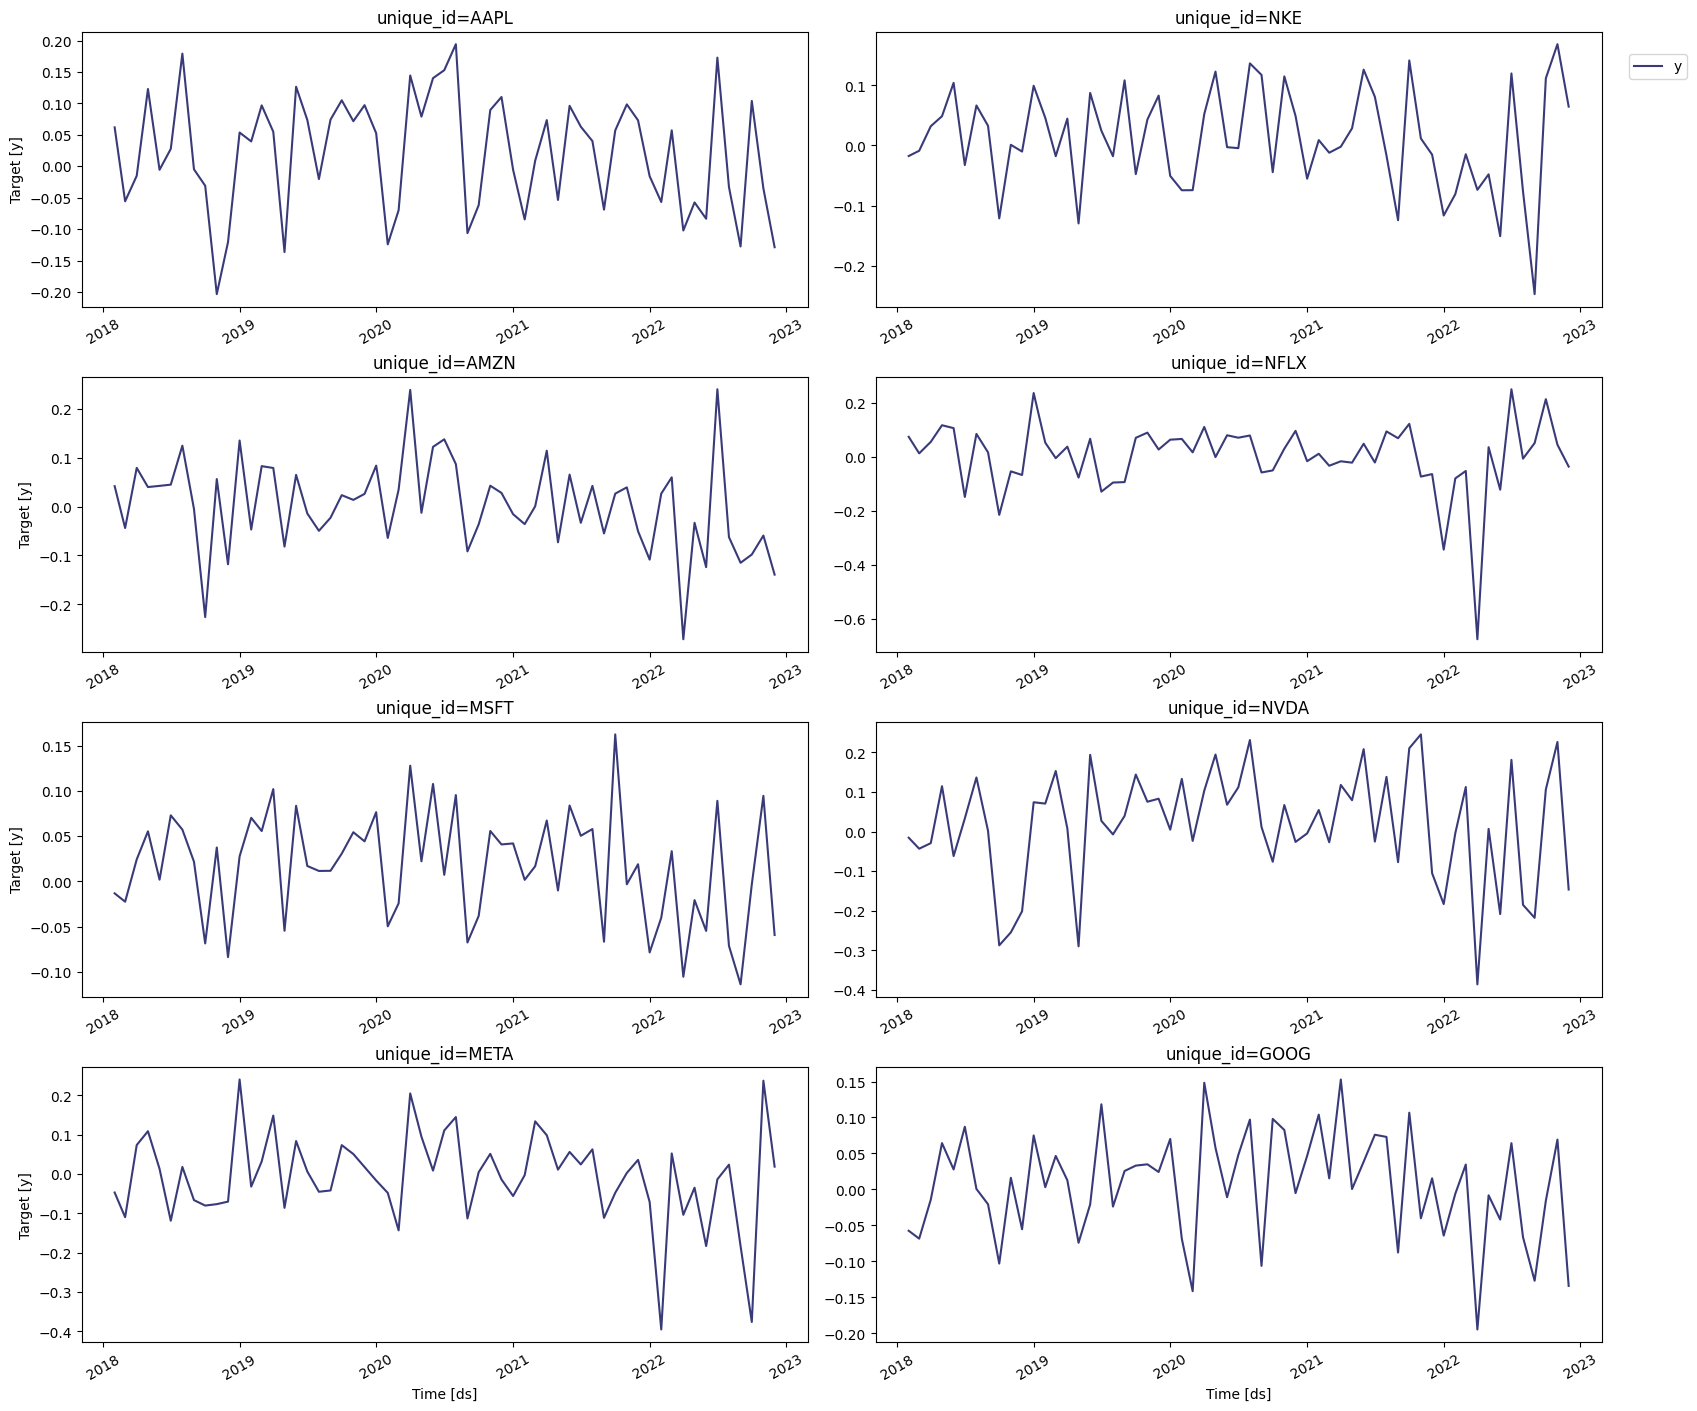

In [12]:
StatsForecast.plot(returns)

In [14]:
from statsforecast.models import (
    GARCH, 
    ARCH, 
    Naive
)

models = [ARCH(1), 
          ARCH(2), 
          GARCH(1,1),
          GARCH(1,2),
          GARCH(2,2),
          GARCH(2,1),
          Naive()
]
sf = StatsForecast(
    models = models, 
    freq = 'MS',
    n_jobs = -1
)

In [16]:
cv_df = sf.cross_validation(
    df = returns,
    h = 3,
    step_size = 3,
    n_windows = 4
  )
cv_df.rename(columns = {'y' : 'actual'}, inplace = True)
cv_df.head()

,unique_id,ds,cutoff,actual,ARCH(1),ARCH(2),"GARCH(1,1)","GARCH(1,2)","GARCH(2,2)","GARCH(2,1)",Naive
0,AAPL,2022-01-01,2021-12-01,-0.015837,0.142418,0.144016,0.142955,0.141685,0.141685,0.144972,0.073062
1,AAPL,2022-02-01,2021-12-01,-0.056856,-0.056897,-0.057158,-0.056388,-0.058787,-0.058786,-0.056955,0.073062
2,AAPL,2022-03-01,2021-12-01,0.057156,-0.045899,-0.046479,-0.047513,-0.045713,-0.045712,-0.047716,0.073062
3,AAPL,2022-04-01,2022-03-01,-0.102178,0.138654,0.140218,0.136212,0.136124,0.136123,0.136549,0.057156
4,AAPL,2022-05-01,2022-03-01,-0.057506,-0.056008,-0.056269,-0.054599,-0.057080,-0.057080,-0.053788,0.057156


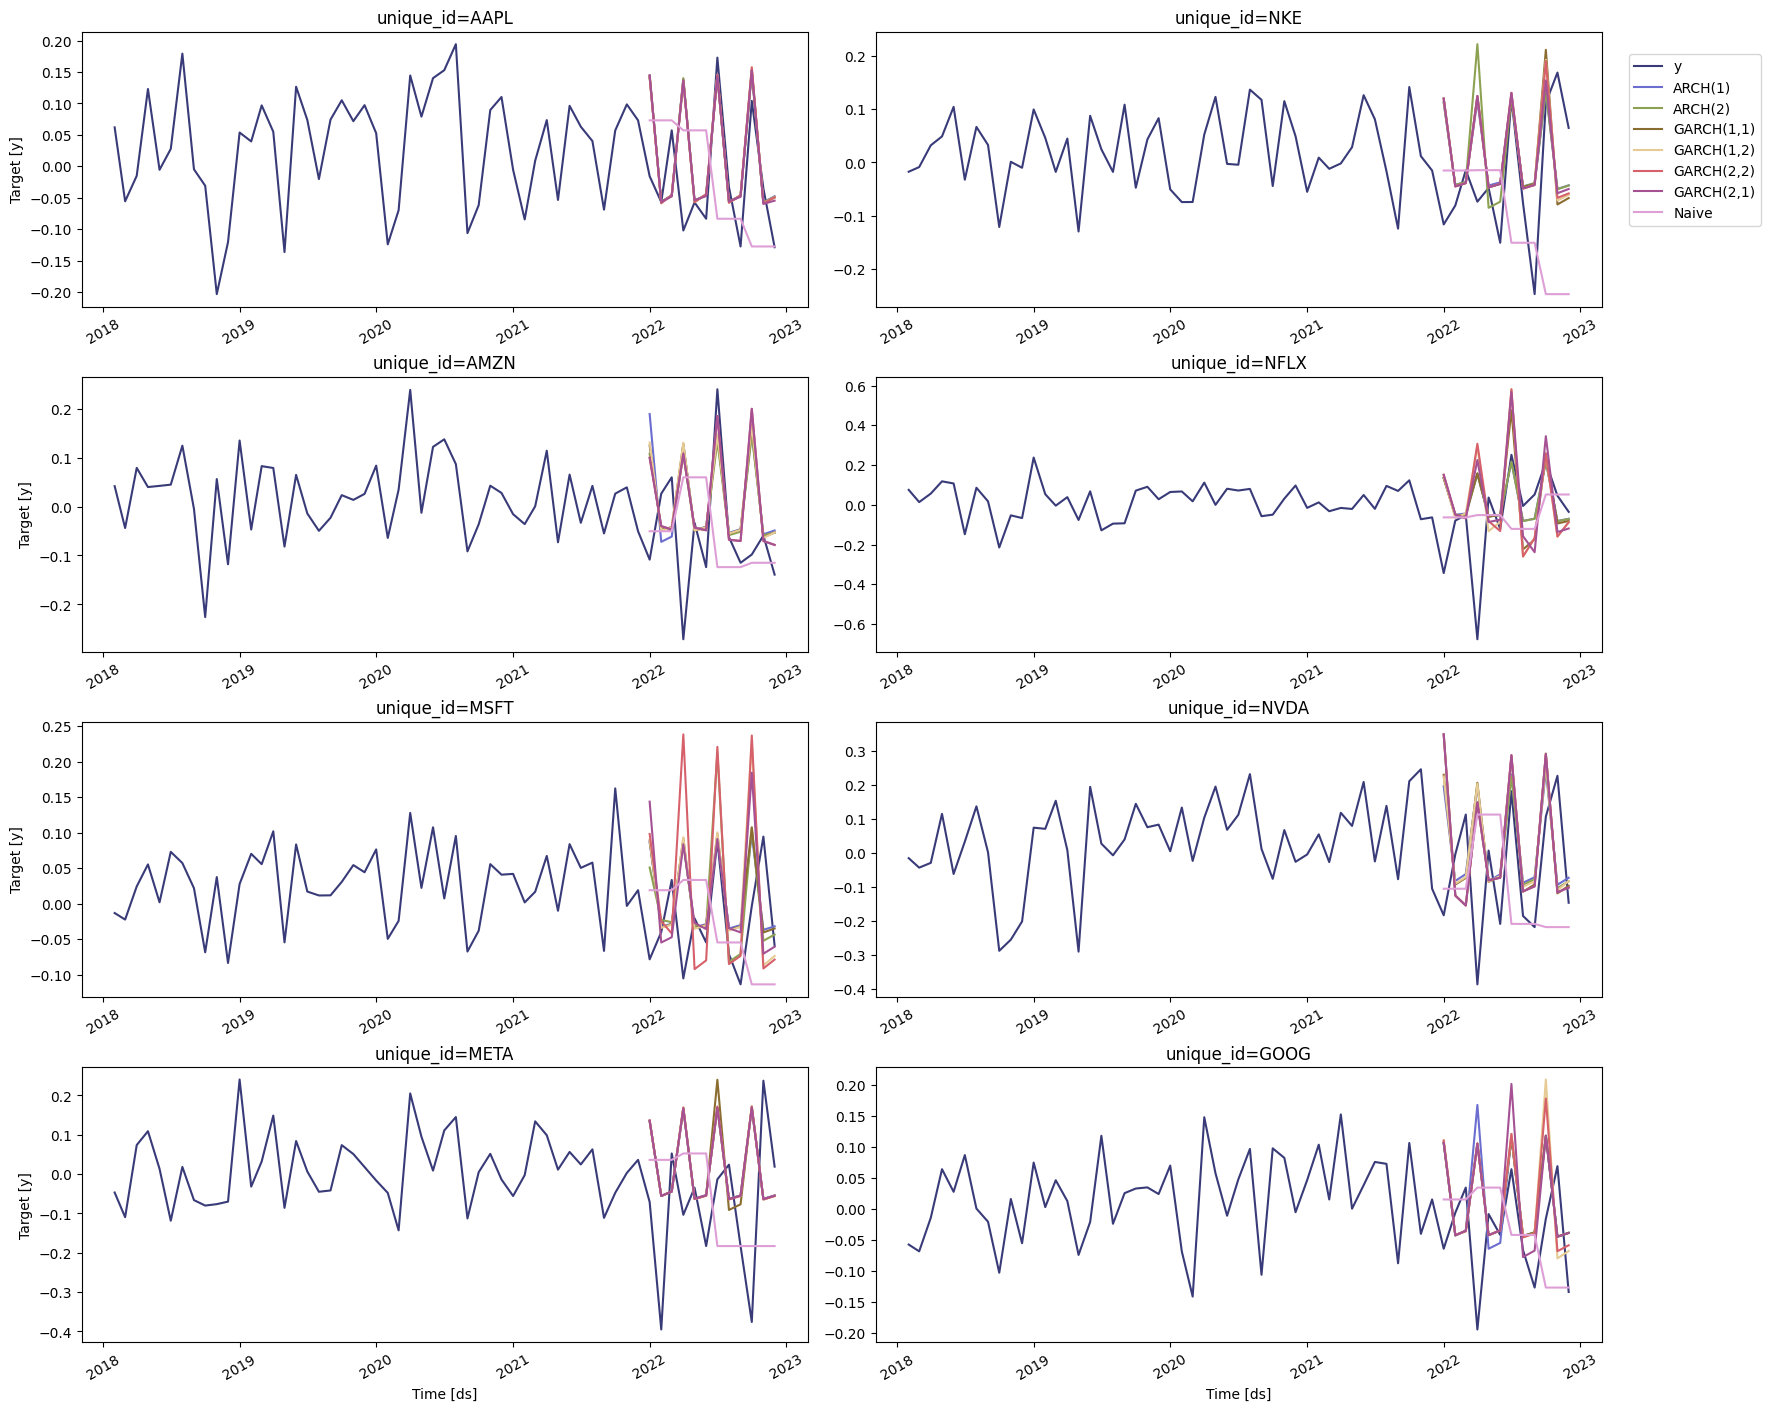

In [17]:
StatsForecast.plot(returns, cv_df.drop(['cutoff', 'actual'], axis=1))

In [18]:
from utilsforecast.losses import mae
models = cv_df.columns.drop(['unique_id', 'ds', 'cutoff', 'actual'])

In [19]:
mae_cv = mae(cv_df, models=models, target_col='actual').set_index('unique_id')
mae_cv

,ARCH(1),ARCH(2),"GARCH(1,1)","GARCH(1,2)","GARCH(2,2)","GARCH(2,1)",Naive
unique_id,,,,,,,
AAPL,0.068843,0.068927,0.068929,0.069186,0.069185,0.068547,0.110426
AMZN,0.127390,0.113613,0.118859,0.119930,0.109910,0.109910,0.115189
GOOG,0.101329,0.093751,0.093880,0.102312,0.099549,0.097520,0.083233
META,0.198334,0.198892,0.205729,0.199709,0.199712,0.198888,0.185346
MSFT,0.070768,0.073231,0.072241,0.085573,0.111597,0.083162,0.086951
NFLX,0.159386,0.159528,0.199623,0.232477,0.230075,0.230770,0.167421
NKE,0.098644,0.107458,0.110496,0.107999,0.107178,0.102708,0.160405
NVDA,0.189459,0.207871,0.199003,0.197857,0.211928,0.211928,0.215289
SPY,0.058512,0.058584,0.059418,0.056629,0.076956,0.058523,0.089012


In [20]:
mae_cv.idxmin(axis=1)

unique_id
AAPL    GARCH(2,1)
AMZN    GARCH(2,2)
GOOG         Naive
META         Naive
MSFT       ARCH(1)
NFLX       ARCH(1)
NKE        ARCH(1)
NVDA       ARCH(1)
SPY     GARCH(1,2)
TSLA    GARCH(1,1)
dtype: object

### Forecast volatility

In [22]:
levels = [80, 95] # confidence levels for the prediction intervals 

forecasts = sf.forecast(df=returns, h=3, level=levels)
forecasts.head()

,unique_id,ds,ARCH(1),ARCH(1)-lo-95,ARCH(1)-lo-80,ARCH(1)-hi-80,ARCH(1)-hi-95,ARCH(2),ARCH(2)-lo-95,ARCH(2)-lo-80,...,"GARCH(2,1)","GARCH(2,1)-lo-95","GARCH(2,1)-lo-80","GARCH(2,1)-hi-80","GARCH(2,1)-hi-95",Naive,Naive-lo-80,Naive-lo-95,Naive-hi-80,Naive-hi-95
0,AAPL,2023-01-01,0.150459,0.133643,0.139464,0.161455,0.167275,0.150161,0.133411,0.139209,...,0.147608,0.131423,0.137025,0.158190,0.163792,-0.128762,-0.284463,-0.366886,0.026939,0.109362
1,AAPL,2023-02-01,-0.056943,-0.073925,-0.068047,-0.045840,-0.039962,-0.057208,-0.074347,-0.068415,...,-0.059508,-0.078053,-0.071634,-0.047381,-0.040962,-0.128762,-0.348956,-0.465520,0.091433,0.207997
2,AAPL,2023-03-01,-0.048391,-0.064844,-0.059149,-0.037634,-0.031939,-0.049280,-0.066342,-0.060436,...,-0.054533,-0.075426,-0.068194,-0.040871,-0.033639,-0.128762,-0.398444,-0.541205,0.140920,0.283681
3,AMZN,2023-01-01,0.152147,0.134952,0.140904,0.163391,0.169343,0.148658,0.132242,0.137924,...,0.148599,0.132196,0.137873,0.159324,0.165001,-0.139141,-0.315716,-0.409190,0.037435,0.130909
4,AMZN,2023-02-01,-0.057301,-0.074497,-0.068545,-0.046058,-0.040106,-0.061187,-0.080794,-0.074007,...,-0.069303,-0.094457,-0.085750,-0.052856,-0.044150,-0.139141,-0.388856,-0.521048,0.110575,0.242767


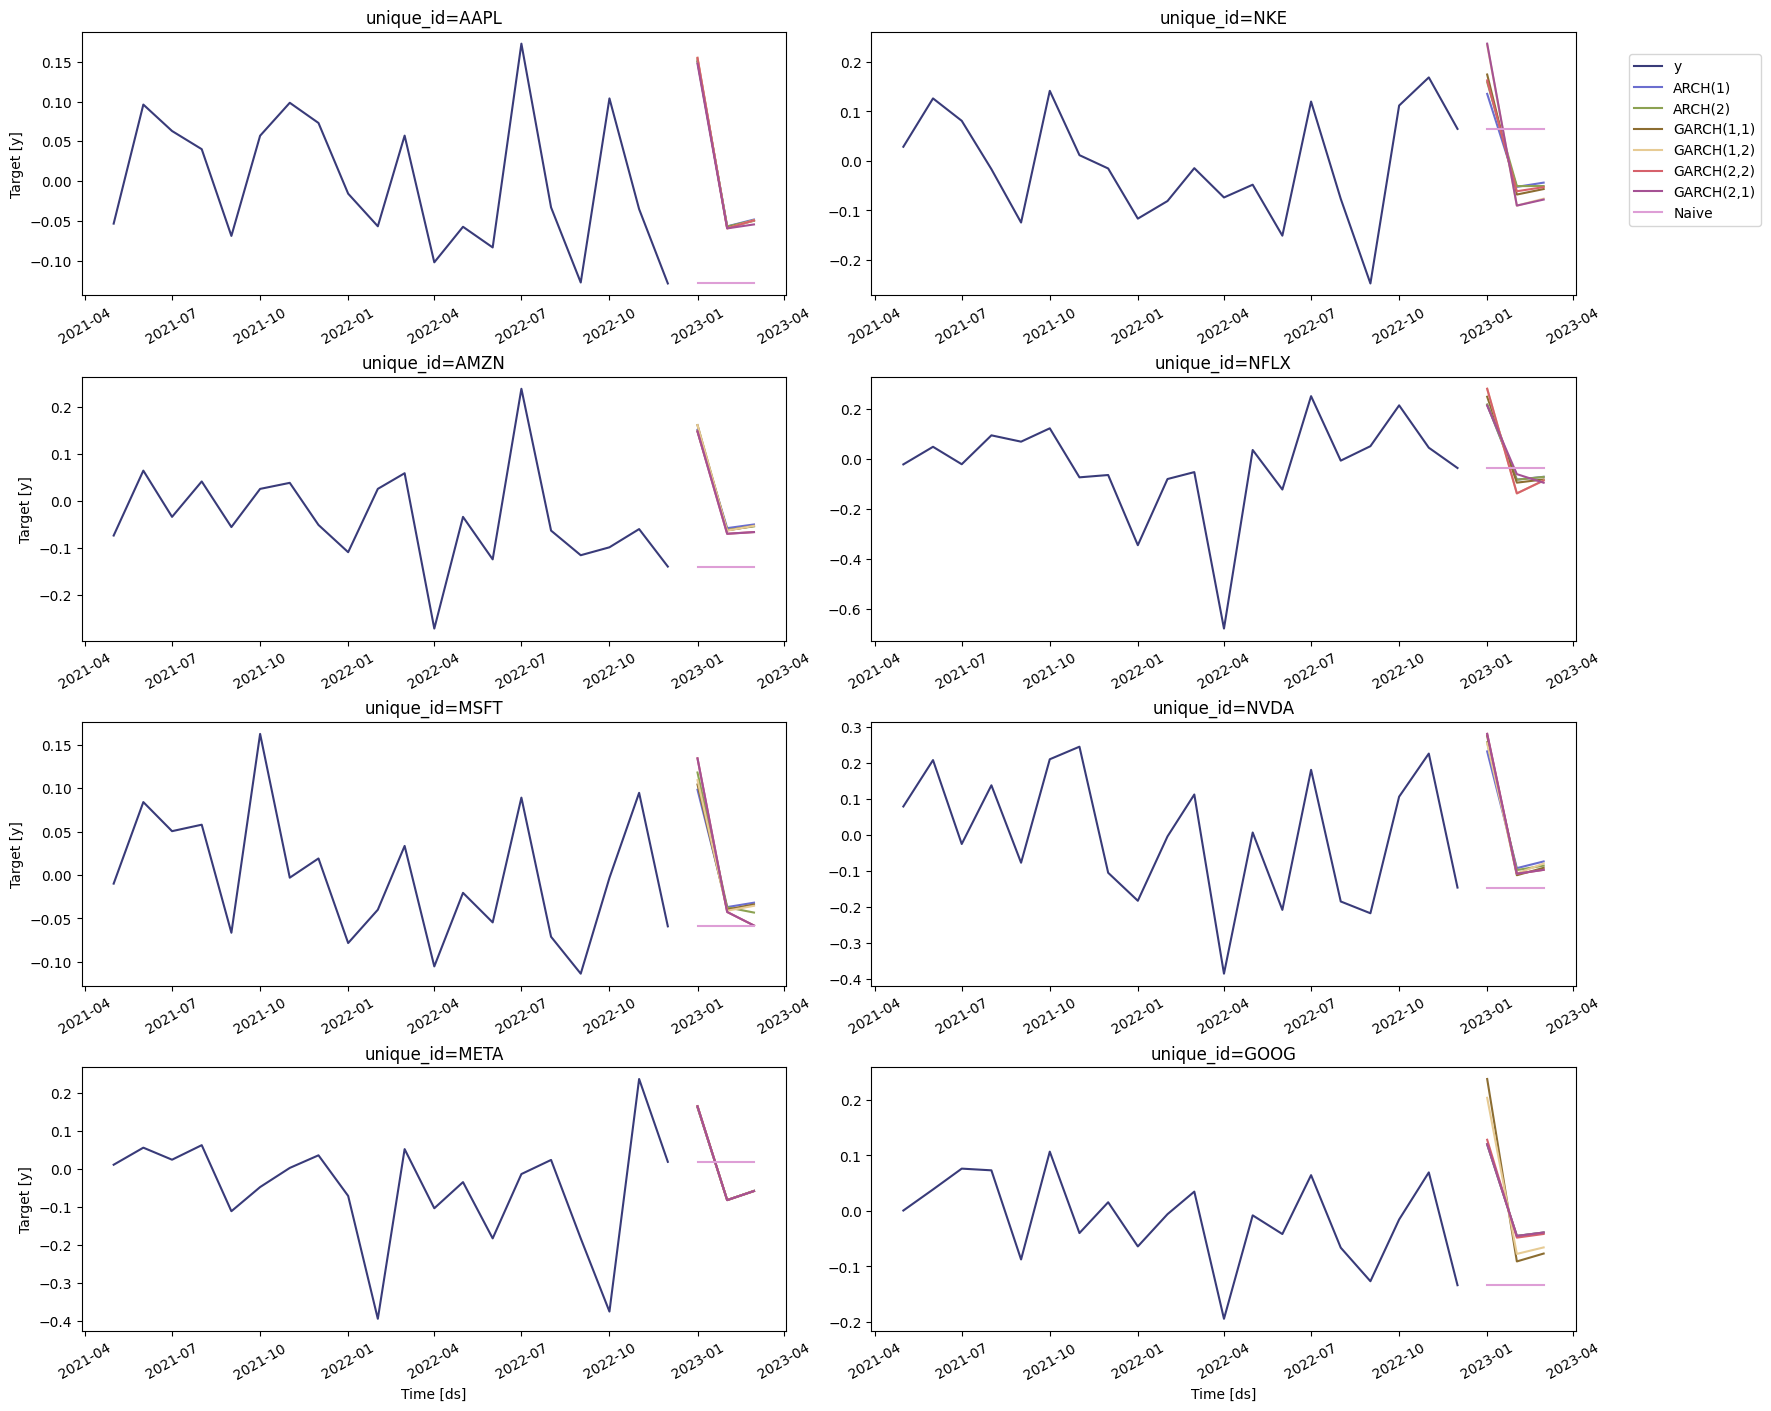

In [23]:
StatsForecast.plot(returns, forecasts, max_insample_length=20)